In [1]:
%matplotlib notebook

In [2]:
import environment
import utility
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Autocorrelation

In [3]:
def autocorr(x,lags):
    '''function to compute correlation of x for lags'''

    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

In [4]:
tmin=9.5*1e9*60*60
tmax=16.5*1e9*60*60
lags=range(20)

Data Selection: some big cap/liquid stocks and some medium cap.
Algorithmic execution slipts large clients order in small ones, hence we expect large autocorr
The splitting is less common in med-cap stocks, hence we expect weakest autocorr

In [5]:
#symbols = (["AAPL","ARQL","CSCO","QQQ","FB","INTC","QCOM","NVDA","CMCSA","AMD","EEM","SPY","GDX","MSFT","AMZN"])
#symbols.sort()
#dates = ['01302019','12282018','05302019','05302018','03272019']
symbols = ["AAPL","RARE","MSFT","INTC","CSCO"]
dates = ['01302019','12282018','05302019','05302018','03272019']

In [6]:
def get_acf(date,symbol,lags=range(50)):
    a = environment.ts(date,'NASDAQ',symbol,PATH="/Volumes/LaCie/")
    executions = a.messages[(a.messages.type=="E") & (a.messages.time < tmax) & (a.messages.time > tmin)]
    sign = executions.loc[:,['time','side']]
    sign.loc[:,'side'] = sign.side.apply(lambda x: x if x else -1)
    acf = autocorr(sign.side.values, lags=lags)
    return acf

def plot_acf(lags,acf):
    plt.loglog(lags,acf)

In [7]:
acfs={}
tmp = {}
for s in symbols:
    for d in dates:
        print(s,d,sep="\t")
        tmp[d] = get_acf(d,s,lags)
    acfs[s] = np.mean(np.array(list(tmp.values())),axis=0)
    tmp = {}

AAPL	01302019
AAPL	12282018
AAPL	05302019
AAPL	05302018
AAPL	03272019
RARE	01302019
RARE	12282018
RARE	05302019
RARE	05302018
RARE	03272019
MSFT	01302019


/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


MSFT	12282018
MSFT	05302019
MSFT	05302018
MSFT	03272019
INTC	01302019
INTC	12282018
INTC	05302019
INTC	05302018
INTC	03272019
CSCO	01302019
CSCO	12282018
CSCO	05302019
CSCO	05302018
CSCO	03272019


Log log Plot of the autocorrelation for different stocks

<IPython.core.display.Javascript object>


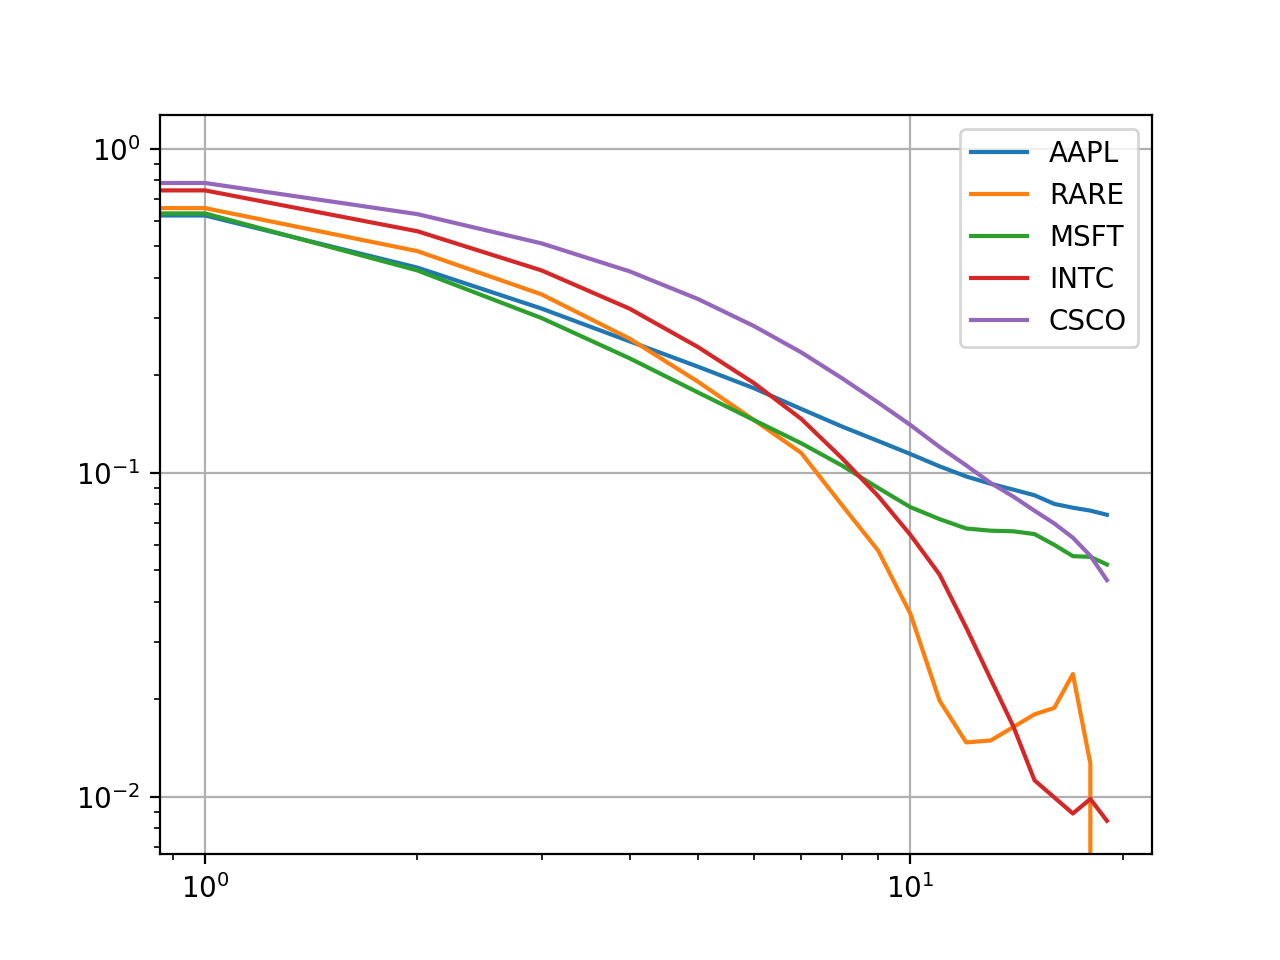

In [8]:
plt.figure()
for s in symbols:
    plot_acf(range(20),acfs[s])
plt.grid(1)
plt.legend(symbols)
plt.show()    